In [1]:
import ipympl
%matplotlib widget
%matplotlib inline
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib.widgets as widget
import numpy as np
import sympy as sy
from sympy import *
import pandas as pd
#from causalgraphicalmodels import CausalGraphicalModel
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

Función principal para hallar los interceptos en equilibrio y con un shock.

In [2]:
# líneas punteadas autómaticas

    # definir la función line_intersection
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

def grafico_ingreso_equilibrio(DA, L_45, Y, a):
    DA_values = DA(Y)
    L_45_values = L_45(a, Y)

    # Encontrar el punto de intersección
    intersec = line_intersection(
        (DA_values[0], Y[0]),
        (DA_values[-1], Y[-1]),
        (L_45_values[0], Y[0]),
        (L_45_values[-1], Y[-1])
    )

    # Crear el gráfico
    y_max = np.max(DA_values)
    fig, ax = plt.subplots(figsize=(10, 8))

    ax.plot(Y, DA_values, label="DA", color="#3D59AB")
    ax.plot(Y, L_45_values, color="#404040")

    ax.yaxis.set_major_locator(plt.NullLocator())   
    ax.xaxis.set_major_locator(plt.NullLocator())

    ax.plot([min(Y), intersec[1]], [intersec[0], intersec[0]], linestyle=':', color='grey')
    ax.plot([intersec[1], intersec[1]], [min(L_45_values), intersec[0]], linestyle=':', color="grey")

    plt.text(0, intersec[0]+5, '$DA^e$', fontsize=11.5, color='black')
    plt.text(intersec[1]+2, 0, '$Y^e$', fontsize=12, color='black')
    plt.text(0, intersec[0]-20, '$α_o$', fontsize=15, color='black')
    plt.text(6, 4, '$45°$', fontsize=11.5, color='black')
    plt.text(2.5, -3, '$◝$', fontsize=30, color='#404040')

    ax.set(title="El ingreso de Equilibrio a Corto Plazo", xlabel=r'Y', ylabel=r'DA')
    ax.legend()

    plt.show()

# Parámetros
Y_size = 100 
Co, Io, Go, Xo = 35, 40, 70, 2
h, r, b, m, t = 0.7, 0.9, 0.8, 0.2, 0.3
Y = np.arange(Y_size)
a = 2.5

# Ecuación de la curva del ingreso de equilibrio
def DA(Co, Io, Go, Xo, h, r, b, m, t, Y):
    return (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)

# Recta de 45 Grados
def L_45(a, Y):
    return a * Y

# Crear el gráfico utilizando la función
grafico_ingreso_equilibrio(DA, L_45, Y, a)


TypeError: DA() missing 9 required positional arguments: 'Io', 'Go', 'Xo', 'h', 'r', 'b', 'm', 't', and 'Y'

In [5]:

# Parámetros
Y_size = 100 
Co, Io, Go, Xo = 35, 40, 70, 2
h, r, b, m, t = 0.7, 0.9, 0.8, 0.2, 0.3
Y = np.arange(Y_size)
a = 2.5

# Ecuación de la curva del ingreso de equilibrio
def DA(Co, Io, Go, Xo, h, r, b, m, t, Y):
    return (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)

# Recta de 45 Grados
def L_45(a, Y):
    return a * Y

# Crear el gráfico utilizando la función
grafico_ingreso_equilibrio(DA, L_45, Y, a)


TypeError: DA() missing 9 required positional arguments: 'Io', 'Go', 'Xo', 'h', 'r', 'b', 'm', 't', and 'Y'

In [3]:
#--------------------------------------------------
# Curva de ingreso de equilibrio ORIGINAL

    # Parámetros
Y_size = 100

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8
m = 0.2
t = 0.3
r = 0.9

Y = np.arange(Y_size)

    # Ecuación
def DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y):
    DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    return DA_K

DA_IS_K = DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y)


#--------------------------------------------------
# NUEVA curva de ingreso de equilibrio

    # Definir SOLO el parámetro cambiado
Go = 35

# Generar la ecuación con el nuevo parámetro
def DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y):
    DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    return DA_K

DA_G = DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y)

In [4]:
# Recta de 45°
a = 2.5

def L_45(a, Y):
    L_45 = a*Y
    return L_45

L_45 = L_45(a, Y)

In [7]:
# EN EQUILIBRIO 
    # coordenadas de las curvas (x,y)
A = [DA_IS_K[0], Y[0]] # DA, coordenada inicio
B = [DA_IS_K[-1], Y[-1]] # DA, coordenada fin

C = [L_45[0], Y[0]] # L_45, coordenada inicio
D = [L_45[-1], Y[-1]] # L_45, coordenada fin

    # creación de intersección

eq_0 = line_intersection((A, B), (C, D))
eq_0 # (y,x)

(175.9254807692308, 70.37019230769232)

In [8]:
# CON SHOCK EN EL GASTO PÚBLICO
    # coordenadas de las curvas (x,y)
A = [DA_G[0], Y[0]] # DA, coordenada inicio
B = [DA_G[-1], Y[-1]] # DA, coordenada fin

C = [L_45[0], Y[0]] # L_45, coordenada inicio
D = [L_45[-1], Y[-1]] # L_45, coordenada fin

    # creación de intersección

eq_01 = line_intersection((A, B), (C, D))
eq_01 # (y,x)

(133.8581730769231, 53.54326923076924)

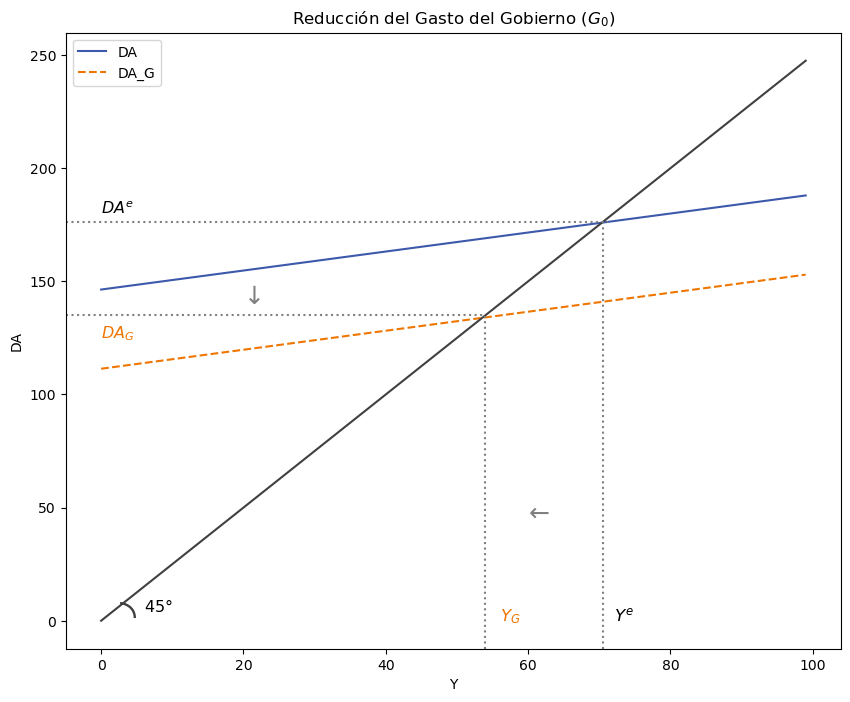

In [38]:
# Gráfico
y_max = np.max(DA_IS_K)
fig, ax = plt.subplots(figsize=(10, 8))


# Curvas a graficar
ax.plot(Y, DA_IS_K, label = "DA", color = "#3D59AB") #curva ORIGINAL
ax.plot(Y, DA_G, label = "DA_G", color = "#EE7600", linestyle = 'dashed') #NUEVA curva
ax.plot(Y, L_45, color = "#404040") #línea de 45º

# Lineas punteadas
plt.axvline(x = 70.5, ymin= 0, ymax = 0.69, linestyle = ":", color = "grey")
plt.axhline(y = 176, xmin= 0, xmax = 0.7, linestyle = ":", color = "grey")
plt.axvline(x = 54,  ymin= 0, ymax = 0.54, linestyle = ":", color = "grey")
plt.axhline(y = 135, xmin= 0, xmax = 0.54, linestyle = ":", color = "grey")

# Texto agregado
plt.text(0, 180, '$DA^e$', fontsize = 11.5, color = 'black')
plt.text(0, 125, '$DA_G$', fontsize = 11.5, color = '#EE7600')
plt.text(6, 4, '$45°$', fontsize = 11.5, color = 'black')
plt.text(2.5, -3, '$◝$', fontsize = 30, color = '#404040')
plt.text(72, 0, '$Y^e$', fontsize = 12, color = 'black')
plt.text(56, 0, '$Y_G$', fontsize = 12, color = '#EE7600')
plt.text(60, 45, '$←$', fontsize = 18, color = 'grey')
plt.text(20, 140, '$↓$', fontsize = 18, color = 'grey')

# Título y leyenda
ax.set(title = "Reducción del Gasto del Gobierno $(G_0)$", xlabel = r'Y', ylabel = r'DA')
ax.legend()

plt.show()

# Optimizado

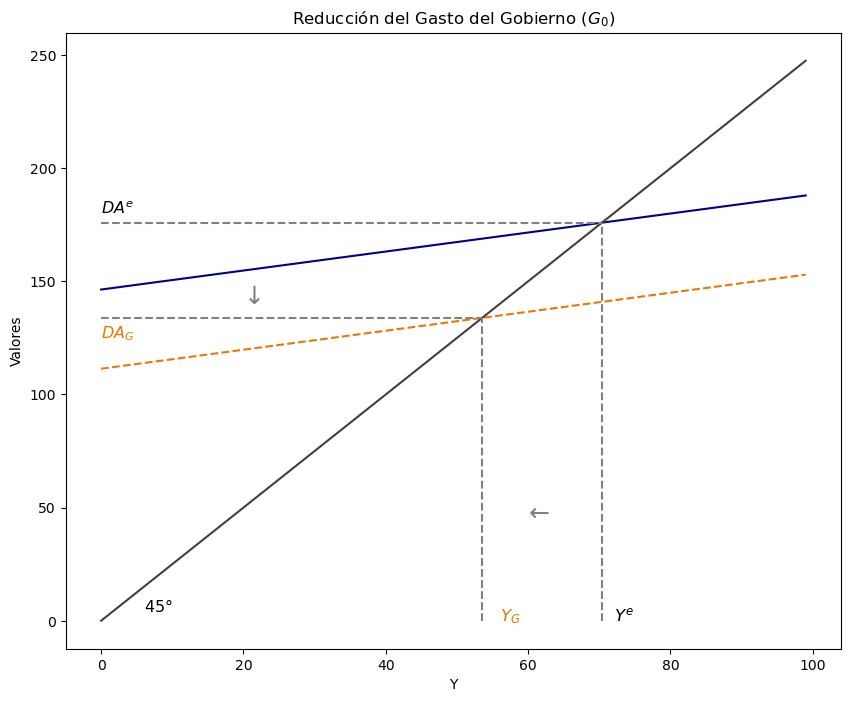

In [37]:
# Gráfico
y_max = np.max(DA_IS_K)
fig, ax1 = plt.subplots(figsize=(10, 8))
# Título y leyenda
ax.set(title = "Reducción del Gasto del Gobierno $(G_0)$", xlabel = r'Y', ylabel = r'DA')

# Curvas a graficar
# Trazar las curvas DA_IS_K y DA_G
plt.plot(Y, DA_IS_K, label='DA_IS_K', linestyle='-',color = "#00008B") #curva ORIGINAL
plt.plot(Y, DA_G, label='DA_G', linestyle='--', color = '#EE7600') #NUEVA curva

# Trazar la curva L_45
plt.plot(Y, L_45, label='L_45', linestyle='-', color = "#404040")
plt.text(6, 4, '$45°$', fontsize = 11.5, color = 'black')

# Agregar líneas punteadas desde los ejes X e Y hacia los puntos de equilibrio
plt.plot([eq_0[1], eq_0[1]], [0, eq_0[0]], linestyle='--', color='gray')
plt.plot([0, eq_0[1]], [eq_0[0], eq_0[0]], linestyle='--', color='gray')
plt.plot([eq_01[1], eq_01[1]], [0, eq_01[0]], linestyle='--', color='gray')
plt.plot([0, eq_01[1]], [eq_01[0], eq_01[0]], linestyle='--', color='gray')

# Texto agregado
plt.text(0, 180, '$DA^e$', fontsize = 11.5, color = 'black')
plt.text(0, 125, '$DA_G$', fontsize = 11.5, color = '#EE7600')
plt.text(72, 0, '$Y^e$', fontsize = 12, color = 'black')
plt.text(56, 0, '$Y_G$', fontsize = 12, color = '#EE7600')
plt.text(60, 45, '$←$', fontsize = 18, color = 'grey')
plt.text(20, 140, '$↓$', fontsize = 18, color = 'grey')

# Etiquetas y leyenda
plt.title("Reducción del Gasto del Gobierno $(G_0)$")
plt.xlabel('Y')
plt.ylabel('Valores')
ax.legend()

plt.show()

Política fiscal expansiva con una reducción de la Tasa de Tributación  (𝑡)
 :

In [47]:
#--------------------------------------------------
# Curva de ingreso de equilibrio ORIGINAL

    # Parámetros
Y_size = 100

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8
m = 0.2
t = 0.3 #tasa de tributación
r = 0.9

Y = np.arange(Y_size)

    # Ecuación
def DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y):
    DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    return DA_K

DA_IS_K = DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y)


#--------------------------------------------------
# NUEVA curva de ingreso de equilibrio

    # Definir SOLO el parámetro cambiado
t = 0.01

# Generar la ecuación con el nuevo parámetros
def DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y):
    DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    return DA_K

DA_t = DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y)

In [48]:
# EN EQUILIBRIO 
    # coordenadas de las curvas (x,y)
A = [DA_IS_K[0], Y[0]] # DA, coordenada inicio
B = [DA_IS_K[-1], Y[-1]] # DA, coordenada fin

C = [L_45[0], Y[0]] # L_45, coordenada inicio
D = [L_45[-1], Y[-1]] # L_45, coordenada fin

    # creación de intersección

intersec = line_intersection((A, B), (C, D))
intersec # (y,x)

(175.9254807692308, 70.37019230769232)

In [49]:
# CON SHOCK EN LA TASA IMPOSITIVA
    # coordenadas de las curvas (x,y)
A = [DA_t[0], Y[0]] # DA, coordenada inicio
B = [DA_t[-1], Y[-1]] # DA, coordenada fin

C = [L_45[0], Y[0]] # L_45, coordenada inicio
D = [L_45[-1], Y[-1]] # L_45, coordenada fin

    # creación de intersección

intersec2 = line_intersection((A, B), (C, D))
intersec2 # (y,x)

(191.98583420776498, 76.79433368310599)

Original 

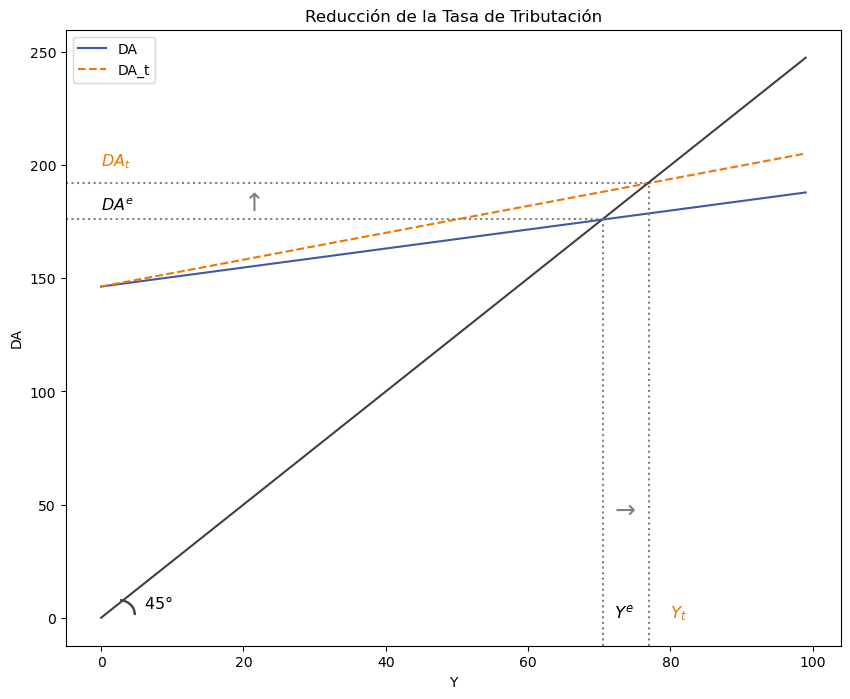

In [50]:
# Gráfico
y_max = np.max(DA_IS_K)
fig, ax = plt.subplots(figsize=(10, 8))


# Curvas a graficar
ax.plot(Y, DA_IS_K, label = "DA", color = "#3D59AB") #curva ORIGINAL
ax.plot(Y, DA_t, label = "DA_t", color = "#EE7600", linestyle = 'dashed') #NUEVA curva
ax.plot(Y, L_45, color = "#404040") #línea de 45º

# Lineas punteadas
plt.axvline(x = 70.5, ymin= 0, ymax = 0.69, linestyle = ":", color = "grey")
plt.axhline(y = 176, xmin= 0, xmax = 0.7, linestyle = ":", color = "grey")
plt.axvline(x = 77,  ymin= 0, ymax = 0.75, linestyle = ":", color = "grey")
plt.axhline(y = 192, xmin= 0, xmax = 0.75, linestyle = ":", color = "grey")

# Texto agregado
plt.text(0, 180, '$DA^e$', fontsize = 11.5, color = 'black')
plt.text(0, 200, '$DA_t$', fontsize = 11.5, color = '#EE7600')
plt.text(6, 4, '$45°$', fontsize = 11.5, color = 'black')
plt.text(2.5, -3, '$◝$', fontsize = 30, color = '#404040')
plt.text(72, 0, '$Y^e$', fontsize = 12, color = 'black')
plt.text(80, 0, '$Y_t$', fontsize = 12, color = '#EE7600')
plt.text(72, 45, '$→$', fontsize = 18, color = 'grey')
plt.text(20, 180, '$↑$', fontsize = 18, color = 'grey')

# Título y leyenda
ax.set(title = "Reducción de la Tasa de Tributación", xlabel = r'Y', ylabel = r'DA')
ax.legend()

plt.show()

# Optimizado

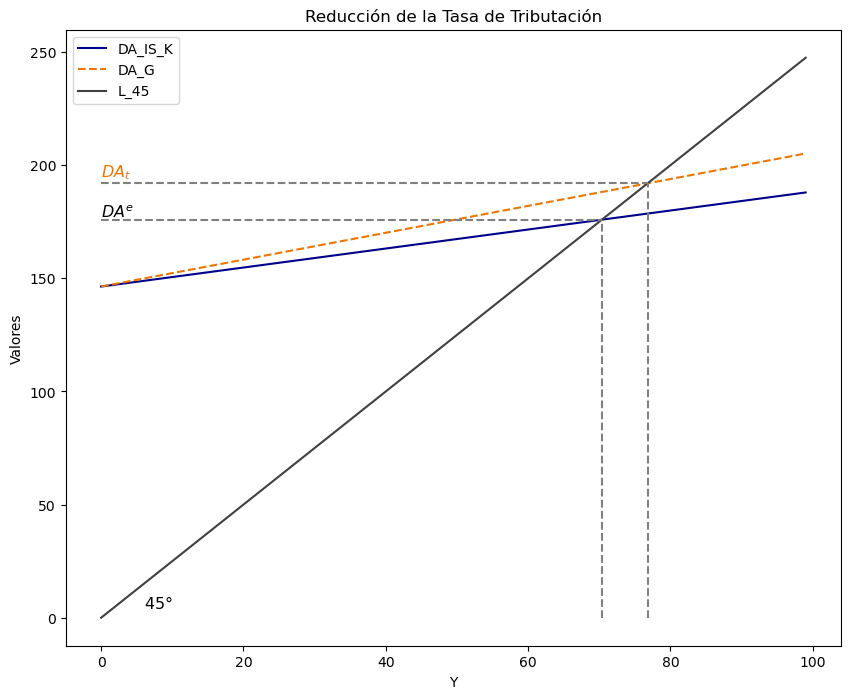

In [51]:
# Gráfico
plt.figure(figsize=(10, 8))  # Ajusta el tamaño del gráfico

# Trazar las curvas DA_IS_K y DA_G
plt.plot(Y, DA_IS_K, label='DA_IS_K', linestyle='-',color = "#00008B")
plt.plot(Y, DA_t, label='DA_G', linestyle='--', color = '#EE7600')

plt.text(0, 177, '$DA^e$', fontsize=11.5, color='black')
plt.text(0, 195, '$DA_t$', fontsize=11.5, color = '#EE7600')

# Trazar la curva L_45
plt.plot(Y, L_45, label='L_45', linestyle='-', color = "#404040")
plt.text(6, 4, '$45°$', fontsize = 11.5, color = 'black')

# Agregar líneas punteadas desde los ejes X e Y hacia los puntos de equilibrio
plt.plot([intersec[1], intersec[1]], [0, intersec[0]], linestyle='--', color='gray')
plt.plot([0, intersec[1]], [intersec[0], intersec[0]], linestyle='--', color='gray')
plt.plot([intersec2[1], intersec2[1]], [0, intersec2[0]], linestyle='--', color='gray')
plt.plot([0, intersec2[1]], [intersec2[0], intersec2[0]], linestyle='--', color='gray')

# Etiquetas y leyenda
plt.title('Reducción de la Tasa de Tributación')
plt.xlabel('Y')
plt.ylabel('Valores')
plt.legend()

# Mostrar el gráfico
plt.grid(False)  # Opcional: agregar una cuadrícula al gráfico
plt.show()

1.3.5.3. Analice una Política Fiscal Expansiva con aumento del Gasto del Gobierno

In [39]:
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8
m = 0.2
t = 0.3
r = 0.9
g = 0.2

Y = np.arange(Y_size)

# Ecuación de la curva del ingreso de equilibrio

def DA_C(Co, Io, Go, Xo, h, r, b, m, t, g, Y):
    DA_C = (Co  + Io + Go + Xo - h*r) + [(b-m)*(1-t)-g]*Y
    return DA_C

DA_Cont = DA_C(Co, Io, Go, Xo, h, r, b, m, t, g, Y)


# Nueva curva

Go = 100

def DA_C(Co, Io, Go, Xo, h, r, b, m, t, g, Y):
    DA_C = (Co  + Io + Go + Xo - h*r) + [(b-m)*(1-t)-g]*Y
    return DA_C

DA_C_G = DA_C(Co, Io, Go, Xo, h, r, b, m, t, g, Y)

In [40]:
    # coordenadas de las curvas (x,y)
A = [DA_Cont[0], Y[0]] # DA, coordenada inicio
B = [DA_Cont[-1], Y[-1]] # DA, coordenada fin

C = [L_45[0], Y[0]] # L_45, coordenada inicio
D = [L_45[-1], Y[-1]] # L_45, coordenada fin

    # creación de intersección

eq_02 = line_intersection((A, B), (C, D))
eq_02 # (y,x)

(160.4934210526316, 64.19736842105264)

In [41]:
    # coordenadas de las curvas (x,y)
A = [DA_C_G[0], Y[0]] # DA, coordenada inicio
B = [DA_C_G[-1], Y[-1]] # DA, coordenada fin

C = [L_45[0], Y[0]] # L_45, coordenada inicio
D = [L_45[-1], Y[-1]] # L_45, coordenada fin

    # creación de intersección

eq_03 = line_intersection((A, B), (C, D))
eq_03 # (y,x)

(193.38815789473685, 77.35526315789474)

***Original***

NameError: name 'intersec_G' is not defined

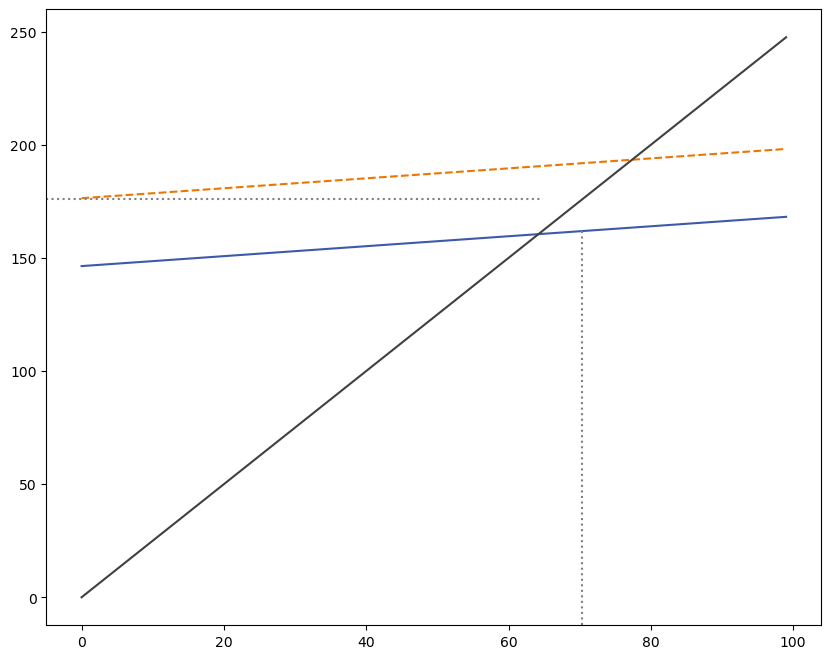

In [45]:
# Gráfico
y_max = np.max(DA_Cont)
fig, ax = plt.subplots(figsize=(10, 8))


# Curvas a graficar
ax.plot(DA_Cont, label = "DA", color = "#3D59AB") #curva ORIGINAL
ax.plot(DA_C_G, label = "DA_G", color = "#EE7600", linestyle = 'dashed') #NUEVA curva
ax.plot(L_45, color = "#404040") #línea de 45º

# Lineas punteadas
plt.axhline(y=intersec[0], xmin= 0, xmax= 0.64, linestyle = ":", color = "grey")
plt.axvline(x=intersec[1], ymin= 0, ymax= 0.64, linestyle = ":", color = "grey")

plt.axhline(y=intersec_G[0], xmin= 0, xmax= 0.76, linestyle = ":", color = "grey")
plt.axvline(x=intersec_G[1], ymin= 0, ymax= 0.76, linestyle = ":", color = "grey")


# Texto agregado
plt.text(0, 135, '$DA^e$', fontsize = 11.5, color = 'black')
plt.text(0, 182, '$DA_G$', fontsize = 11.5, color = '#EE7600')
plt.text(6, 4, '$45°$', fontsize = 11.5, color = 'black')
plt.text(2.5, -3, '$◝$', fontsize = 30, color = '#404040')
plt.text(60, 0, '$Y^e$', fontsize = 12, color = 'black')
plt.text(72, 0, '$Y_G$', fontsize = 12, color = '#EE7600')
plt.text(70, 45, '$→$', fontsize = 18, color = 'grey')
plt.text(20, 165, '$↑$', fontsize = 18, color = 'grey')

# Título y leyenda
ax.set(title = "Incremento del Gasto del Gobierno $(G_0)$", xlabel = r'Y', ylabel = r'DA')
ax.legend()

plt.show()

# Optimizado

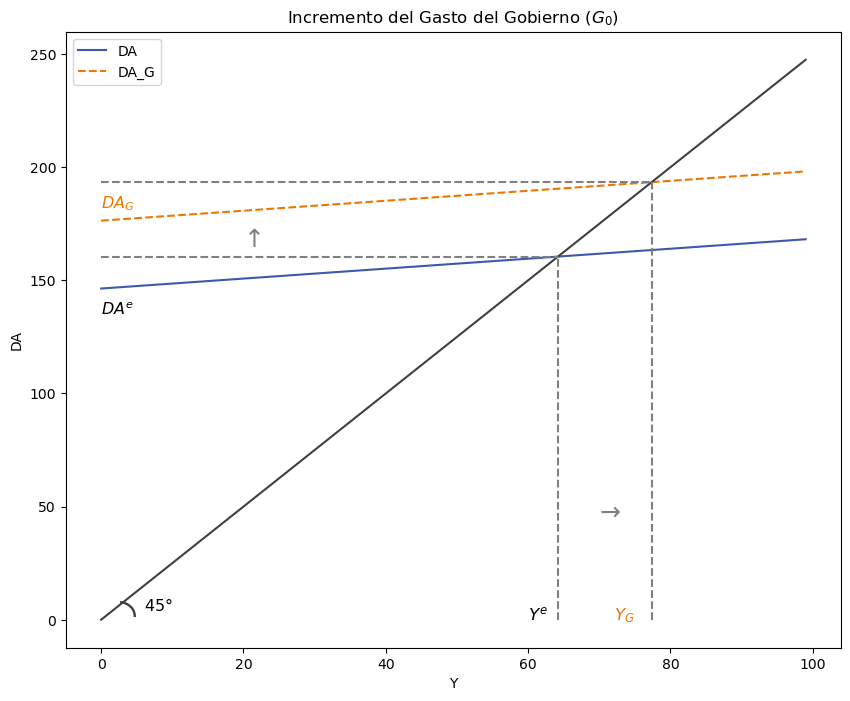

In [44]:
# Gráfico
y_max = np.max(DA_Cont)
fig, ax = plt.subplots(figsize=(10, 8))


# Curvas a graficar
ax.plot(DA_Cont, label = "DA", color = "#3D59AB") #curva ORIGINAL
ax.plot(DA_C_G, label = "DA_G", color = "#EE7600", linestyle = 'dashed') #NUEVA curva
ax.plot(L_45, color = "#404040") #línea de 45º

# Lineas punteadas
plt.plot([eq_02[1], eq_02[1]], [0, eq_02[0]], linestyle='--', color='gray')
plt.plot([0, eq_02[1]], [eq_02[0], eq_02[0]], linestyle='--', color='gray')
plt.plot([eq_03[1], eq_03[1]], [0, eq_03[0]], linestyle='--', color='gray')
plt.plot([0, eq_03[1]], [eq_03[0], eq_03[0]], linestyle='--', color='gray')


# Texto agregado
plt.text(0, 135, '$DA^e$', fontsize = 11.5, color = 'black')
plt.text(0, 182, '$DA_G$', fontsize = 11.5, color = '#EE7600')
plt.text(6, 4, '$45°$', fontsize = 11.5, color = 'black')
plt.text(2.5, -3, '$◝$', fontsize = 30, color = '#404040')
plt.text(60, 0, '$Y^e$', fontsize = 12, color = 'black')
plt.text(72, 0, '$Y_G$', fontsize = 12, color = '#EE7600')
plt.text(70, 45, '$→$', fontsize = 18, color = 'grey')
plt.text(20, 165, '$↑$', fontsize = 18, color = 'grey')

# Título y leyenda
ax.set(title = "Incremento del Gasto del Gobierno $(G_0)$", xlabel = r'Y', ylabel = r'DA')
ax.legend()

plt.show()

1.3.5.4. Analice una crisis mundial que reduce nuestras exportaciones 

In [48]:
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 70
g = 0.2 #solo valores entre 0-0.4
Xo = 15
h = 0.7
b = 0.8 # b > m
m = 0.2
t = 0.3
r = 0.9

Y = np.arange(Y_size)

# Ecuación de la curva del ingreso de equilibrio

def DA_C(Co, Io, Go, Xo, h, r, b, m, t, g, Y):
    DA_C = (Co  + Io + Go + Xo - h*r) + [(b-m)*(1-t)-g]*Y
    return DA_C

DA_Cont = DA_C(Co, Io, Go, Xo, h, r, b, m, t, g, Y)


# Nueva curva

Xo = 1

def DA_C(Co, Io, Go, Xo, h, r, b, m, t, g, Y):
    DA_C = (Co  + Io + Go + Xo - h*r) + [(b-m)*(1-t)-g]*Y
    return DA_C

DA_C_X = DA_C(Co, Io, Go, Xo, h, r, b, m, t, g, Y)

In [52]:
    # coordenadas de las curvas (x,y)
A = [DA_Cont[0], Y[0]] # DA, coordenada inicio
B = [DA_Cont[-1], Y[-1]] # DA, coordenada fin

C = [L_45[0], Y[0]] # L_45, coordenada inicio
D = [L_45[-1], Y[-1]] # L_45, coordenada fin

    # creación de intersección

eq_04 = line_intersection((A, B), (C, D))
eq_04 # (y,x)

(174.7478070175439, 69.89912280701755)

In [53]:
    # coordenadas de las curvas (x,y)
A = [DA_C_X[0], Y[0]] # DA, coordenada inicio
B = [DA_C_X[-1], Y[-1]] # DA, coordenada fin

C = [L_45[0], Y[0]] # L_45, coordenada inicio
D = [L_45[-1], Y[-1]] # L_45, coordenada fin

    # creación de intersección

eq_05  = line_intersection((A, B), (C, D))
eq_05 # (y,x)

(159.39692982456143, 63.75877192982457)

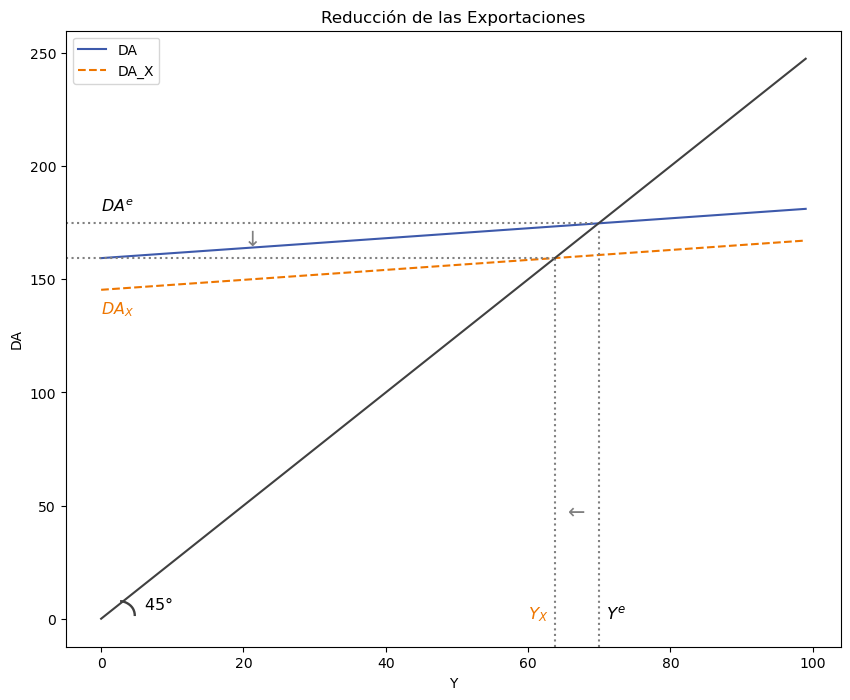

In [50]:
# Gráfico
y_max = np.max(DA_Cont)
fig, ax = plt.subplots(figsize=(10, 8))


# Curvas a graficar
ax.plot(DA_Cont, label = "DA", color = "#3D59AB") #curva ORIGINAL
ax.plot(DA_C_X, label = "DA_X", color = "#EE7600", linestyle = 'dashed') #NUEVA curva
ax.plot(L_45, color = "#404040") #línea de 45º

# Lineas punteadas
plt.axhline(y=intersec[0], xmin= 0, xmax= 0.68, linestyle = ":", color = "grey")
plt.axvline(x=intersec[1], ymin= 0, ymax= 0.68, linestyle = ":", color = "grey")

plt.axhline(y=intersec_X[0], xmin= 0, xmax= 0.63, linestyle = ":", color = "grey")
plt.axvline(x=intersec_X[1], ymin= 0, ymax= 0.63, linestyle = ":", color = "grey")


# Texto agregado
plt.text(0, 180, '$DA^e$', fontsize = 11.5, color = 'black')
plt.text(0, 135, '$DA_X$', fontsize = 11.5, color = '#EE7600')
plt.text(6, 4, '$45°$', fontsize = 11.5, color = 'black')
plt.text(2.5, -3, '$◝$', fontsize = 30, color = '#404040')
plt.text(71, 0, '$Y^e$', fontsize = 12, color = 'black')
plt.text(60, 0, '$Y_X$', fontsize = 12, color = '#EE7600')
plt.text(65.5, 45, '$←$', fontsize = 15, color = 'grey')
plt.text(20, 165, '$↓$', fontsize = 15, color = 'grey')

# Título y leyenda
ax.set(title = "Reducción de las Exportaciones", xlabel = r'Y', ylabel = r'DA')
ax.legend()

plt.show()

# Optimizado

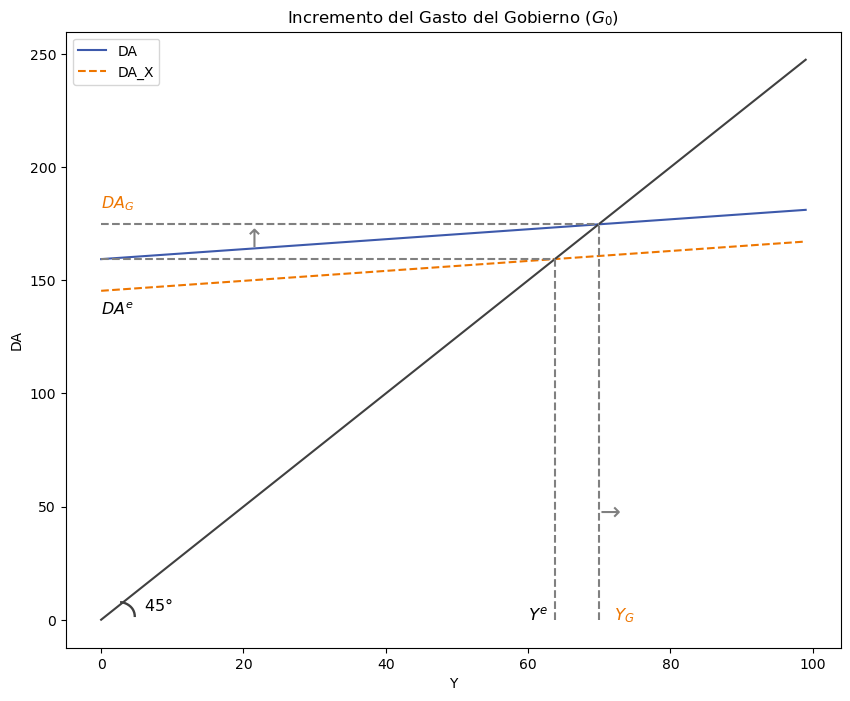

In [54]:
# Gráfico
y_max = np.max(DA_Cont)
fig, ax = plt.subplots(figsize=(10, 8))


# Curvas a graficar
ax.plot(DA_Cont, label = "DA", color = "#3D59AB") #curva ORIGINAL
ax.plot(DA_C_X, label = "DA_X", color = "#EE7600", linestyle = 'dashed') #NUEVA curva
ax.plot(L_45, color = "#404040") #línea de 45º

# Lineas punteadas
plt.plot([eq_04[1], eq_04[1]], [0, eq_04[0]], linestyle='--', color='gray')
plt.plot([0, eq_04[1]], [eq_04[0], eq_04[0]], linestyle='--', color='gray')
plt.plot([eq_05[1], eq_05[1]], [0, eq_05[0]], linestyle='--', color='gray')
plt.plot([0, eq_05[1]], [eq_05[0], eq_05[0]], linestyle='--', color='gray')


# Texto agregado
plt.text(0, 135, '$DA^e$', fontsize = 11.5, color = 'black')
plt.text(0, 182, '$DA_G$', fontsize = 11.5, color = '#EE7600')
plt.text(6, 4, '$45°$', fontsize = 11.5, color = 'black')
plt.text(2.5, -3, '$◝$', fontsize = 30, color = '#404040')
plt.text(60, 0, '$Y^e$', fontsize = 12, color = 'black')
plt.text(72, 0, '$Y_G$', fontsize = 12, color = '#EE7600')
plt.text(70, 45, '$→$', fontsize = 18, color = 'grey')
plt.text(20, 165, '$↑$', fontsize = 18, color = 'grey')

# Título y leyenda
ax.set(title = "Incremento del Gasto del Gobierno $(G_0)$", xlabel = r'Y', ylabel = r'DA')
ax.legend()

plt.show()